# Deep Learning
    Artificial Neural Network
    
For a given dataset predict whether customer will exit (Output variable “Exited”) the bank or not using artificial neural network


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# Importing the Keras libraries and packages (Using TensorFlow backend.)
import keras 
from keras.models import Sequential 
from keras.layers import Dense

import pickle
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import importlib.util

Using TensorFlow backend.


In [2]:
# Importing the database
dataset = pd.read_csv('Churn_Modelling.csv')

### Data preprocessing

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# look dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Check for minimum and maximum values for column in dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
# Checking for null values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Checking for duplicate values
dataset.duplicated().sum()

0

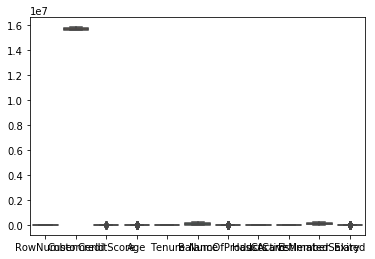

In [8]:
# boxplot to  find outliers of datatset
sb.boxplot(data = dataset)

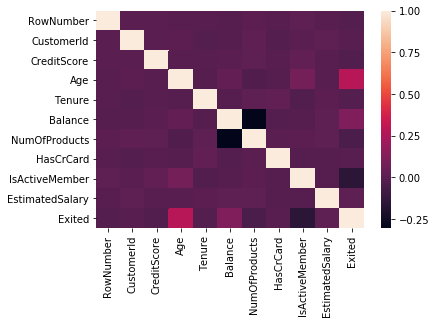

In [9]:
#chekc correlation of target "y" with each other data
corr = dataset.corr()
sb.heatmap(corr)

In [10]:
# easy way to check correlation of target variable to all oather features after getdummies
print (corr['Exited'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Exited'].sort_values(ascending=False)[-10:]) #last 5 values`

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64 

----------------------
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [11]:
# We create matrices of the features of dataset and the target variable,
# split datasetb into x(features) and y(label
x_data = dataset.iloc[:, 3:13].values
y_data = dataset.iloc[:, 13].values
x_data

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [12]:
y_data

array([1, 0, 1, ..., 1, 1, 0])

In [13]:
# We will do the same thing for gender. this will be binary in this dataset
print(x_data[:6,2], '... will now become: ')

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 


In [14]:
"""
#Geography and Gender has a object datatype(string variables) we have to encode it
We make the analysis simpler by encoding string variables.
We are using the ScikitLearn function ‘LabelEncoder’ to automatically encode the different labels
in the columns with values between 0 to n_classes-1.
"""

labelencoder_X_1 = LabelEncoder() 
x_data[:,1] = labelencoder_X_1.fit_transform(x_data[:,1])

labelencoder_X_2 = LabelEncoder() 
x_data[:, 2] = labelencoder_X_2.fit_transform(x_data[:, 2])
x_data

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [15]:
"""We use the same ScikitLearn library and another function called the OneHotEncoder to just pass the column
number creating a dummy variable."""
onehotencoder = OneHotEncoder(categorical_features = [1])
x_data = onehotencoder.fit_transform(x_data).toarray()
x_data = x_data[:, 1:]
x_data

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [16]:
#Splitting the dataset into the Training set and the Test Set
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2)
print("x_train : ", X_train.shape, " x_test : ", X_test.shape)

# Saving testing file into pickle file
test_file = open("CSV_files/Testing_file.csv","wb")
pickle.dump(X_test, test_file)
pickle.dump(Y_test, test_file) 
test_file.close()

# split dataset into training and crossvalidation set
x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size = 0.20)
print("x_train_data : ", x_train.shape, " x_crossV_data : ", x_cv.shape)

x_train :  (8000, 11)  x_test :  (2000, 11)
x_train_data :  (6400, 11)  x_crossV_data :  (1600, 11)


In [17]:
# Feature Scaling
"""
we are fitting and transforming the training data using the StandardScaler function.
We standardize our scaling so that we use the same fitted method to transform/scale test data. 
"""
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
# Data scaled properly. And done with preprocessing 
# If we fit_tranform on train data then no need to fit it again

# X_test = sc.transform(X_test)

### Build Artificial Neural Network Model 

In [18]:
"""We import the required Modules here.We need the Sequential module for initializing the neural network
and the dense module to add the hidden layers."""

"""We will name the model as Classifier as our aim is to classify customer churn. 
Then we use the Sequential module for initialization."""
#Initializing Neural Network 
classifier = Sequential()

In [19]:
x_train.shape, x_train.shape[1]

((6400, 11), 11)

A hurestic tip is that the amount of nodes (dimensions) in your hidden layer should be the average of your 
input and output layers, which means that since we have 11 dimensions (representing Independent variables 
Note: Countries still compose only one dimension) and we are looking for a binary output, we calculate 
this to be  (11+1)÷2=6 .

    activiation: relu becasue we are in an input layer. uses the ReLu activation function for  ϕ

    nput_dim: 11 because we span 11 dimensions in our input layer. This is needed for the first added layer.

    units: 6 nodes (number of nodes in hidden layer). Can think of this as number of nodes are in the next layer.

    kernel_initializer: uniform the distribution with which we randomly initialize weights for the nodes in this layer.
    
    

In [20]:
# 1st layer (addthe input layer and the first hidden layer −)
# Use dense module to add the hidden layers.
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))

# 2nd layer (bcoz we want to implement Deep Learning,which is an ANN with many layers)
# we do not need to specify input dim. 
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# output layer
# sigmoid used instead of the ReLu function becasue it generates probabilities for the outcome. 
# We want the probability that each customer leaves the bank.
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


###### If we want more than two categories, then we will need to change
1) the units parameter to match the desired category count

2) the activation field to softmax. Basically a sigmoid function but applied to a dependent variable that has more than 2 categories.

#### Compiling the Neural network
    
    optimizer: adam The algorithm we want to use to find the optimal set of weights in the neural networks. 
Adam is a very efficeint variation of Stochastic Gradient Descent.
    
    loss: binary_crossentropy This is the loss function used within adam. This should be the logarthmic loss.
If our dependent (output variable) is Binary, it is binary_crossentropy. If Categorical, then it is called categorical_crossentropy

In [21]:
# Compiling Neural Network 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Fitting the Neural Network

    batch_size: How often we want to back-propogate the error values so that individual node weights can be adjusted.

    nb_epochs: The number of times we want to run the entire test data over again to tune the weights. This is like the fuel of the algorithm.

In [22]:
# Fitting ANN to the training set
classifier.fit(x_train, y_train, batch_size = 15, epochs = 60)

Instructions for updating:
Use tf.cast instead.
Epoch 1/60
6400/6400 [==============================] - 1s 103us/step - loss: 0.5383 - acc: 0.7920
Epoch 2/60
6400/6400 [==============================] - 0s 48us/step - loss: 0.4338 - acc: 0.7942
Epoch 3/60
6400/6400 [==============================] - 0s 48us/step - loss: 0.4281 - acc: 0.7942
Epoch 4/60
6400/6400 [==============================] - 0s 49us/step - loss: 0.4241 - acc: 0.7942
Epoch 5/60
6400/6400 [==============================] - 0s 50us/step - loss: 0.4197 - acc: 0.8098
Epoch 6/60
6400/6400 [==============================] - 0s 47us/step - loss: 0.4143 - acc: 0.8317
Epoch 7/60
6400/6400 [==============================] - 0s 49us/step - loss: 0.4103 - acc: 0.8319
Epoch 8/60
6400/6400 [==============================] - 0s 47us/step - loss: 0.4070 - acc: 0.8338
Epoch 9/60
6400/6400 [==============================] - 0s 49us/step - loss: 0.4046 - acc: 0.8342
Epoch 10/60
6400/6400 [==============================] - 0s 49us/step

### Save ANN model 

In [23]:
file = open('ANN_keras.pickle', 'wb')
pickle.dump(classifier, file)
pickle.dump(sc,file)
file.close()

#### Testing the ANN


In [24]:
# Predicting the Test set results
y_pred = classifier.predict(x_cv)
y_pred = (y_pred > 0.5)

In [25]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [26]:
# new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 500, 1, 40, 3, 50000, 2, 1, 1, 40000]])))
new_prediction = classifier.predict(sc.transform(x_cv))
new_prediction = (new_prediction > 0.5)

Significance of the confusion matrix value:
The output should be close to the table below:

        Predicted: No  Predicted: Yes
    Actual:No 1504             91
    Actual:Yes 184           221
    
This means that we should have about  (1504+221)=1726  
correct classifications out of our total testing data size of  2000 . 
This means that our accuracy for this trial was  1726÷2000=86.3% , which matches the classifier's prediction

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_cv, new_prediction)
print (cm)

[[1229   33]
 [ 246   92]]


In [28]:
cm1 = confusion_matrix(y_cv, y_pred)
print (cm)

[[1229   33]
 [ 246   92]]


In [29]:
# Callculating the accuracy
print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')

82.5625 % of testing data was classified correctly


In [32]:
from sklearn.metrics import classification_report

In [34]:
print("classification report\n\n", classification_report(y_cv,new_prediction))

classification report

               precision    recall  f1-score   support

           0       0.83      0.97      0.90      1262
           1       0.74      0.27      0.40       338

    accuracy                           0.83      1600
   macro avg       0.78      0.62      0.65      1600
weighted avg       0.81      0.83      0.79      1600



In [30]:
Accuracy =((1288+0)/1600)*100
print(Accuracy)

80.5


In [31]:
1288+312

1600